In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

sns.set(style='white', context='notebook', palette='deep')

# 1. Data preparation
## 1.1 Loading data

In [8]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

/home/lievisilva/.cache/pypoetry/virtualenvs/cnn-mnist-3oAv3CAk-py3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


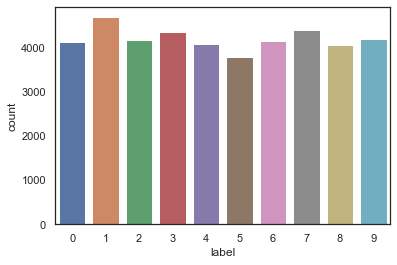

In [9]:
# getting the label (the "response") from the train data
Y_train = train['label']

# removing the label from the train data
X_train = train.drop(labels=["label"], axis=1)

# showing the quantity of labels on the train dataset
g = sns.countplot(Y_train)

## 1.2 Normalization

In [10]:
# verifying if there is any null value
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [11]:
# Transforming the data, that is of range [0..255],
# to [0..1]
X_train = X_train / 255.0
test = test / 255.0

## 1.3 Reshaping

Reshaping the images will transform the pandas `Dataframe` 1D vector of 764 values, into a `np.array` matrix, with 28x28x1(the 1 is the "color channel", in this case, the images is grayscale)

In [12]:
# Reshaping the images in 3 dimensions(height 28px, width 28px, canal 1(grayscale))
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

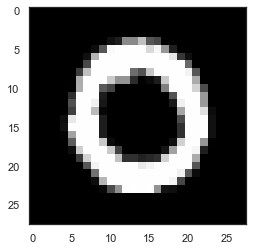

In [13]:
# Plotting the image
g = plt.imshow(X_train[1], cmap='gray')

## 1.4 Label encoding

Is basically transform the Y value, that is what digit the image X is(e.g: 3 or 9), to a vector of the size of all the possible values. All the values will be 0, except for the index of the right value.

E.g: If the y value is 3, the vector will be `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]`

In [14]:
print(f"before:{Y_train[76]}")

before:7


In [15]:
Y_train = to_categorical(Y_train, num_classes=10)
print(f"after: {Y_train[76]}")

after: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## 1.5 Splitting train and validation data

In [16]:
random_seed = 2

In [17]:
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.1, random_state=random_seed
)


## Data Augmentation
- Is artificially expand the data that we have, creating new variations from the existing ones
- On the mnist problem, where the input data is images, we can rotate, scale, decentralize the image to create a slightly different image
- We're gonna use the `ImageDataGenerator` from keras, to create artificial data

In [23]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10, # randomly rotate the image
    zoom_range=0.1, # randomly zoom the image
    width_shift_range=0.1, # randomly shift image horizontally
    height_shift_range=0.1, # randomly shilft images
    vertical_flip=False, # randomly flip the image
)

datagen.fit(X_train)